In [2]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [4]:
#The dataset contains no header for columns, hence the header parameter
data1_abnor=pd.read_csv('./ptbdb_abnormal.csv',header=None)
data1_nor=pd.read_csv('./ptbdb_normal.csv',header=None)
data2_train=pd.read_csv('./mitbih_train.csv',header=None)
data2_test=pd.read_csv('./mitbih_test.csv',header=None)

In [5]:
data1 = pd.concat([data1_abnor, data1_nor]).sample(frac=1).reset_index(drop=True)
data2 = pd.concat([data2_train, data2_test]).sample(frac=1).reset_index(drop=True)

In [23]:
data2.loc[(data2[187] != 0),187]=1

In [26]:
data = pd.concat([data1,data2]).sample(frac=1).reset_index(drop=True)

In [29]:
Y=data[data.columns[-1:]]
X=data[data.columns[:-1]]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.25,random_state=42)
print(x_train.shape)

(30999, 187)


In [31]:
print(len(Y[Y[187] ==0 ]))
print(len(Y[Y[187] ==1 ]))

94635
29363
0
0
0


In [32]:
y_train=y_train.to_numpy()
x_train=x_train.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_train=x_train.reshape([-1,187,1])

In [33]:
y_test=y_test.to_numpy()
x_test=x_test.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_test=x_test.reshape([-1,187,1])

In [36]:
model=tf.keras.Sequential([
    layers.Conv1D(7, 7, activation='relu', input_shape=(187,1)),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(5,5,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Conv1D(3,3,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool1D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(5,activation='softmax') #softmax cuz categories
])

In [37]:
model.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy']) #this was with validation
history=model.fit(x_train,y_train,batch_size=128,epochs=200,verbose=True,validation_split=0.2)

Epoch 1/200
194/194 [==============================] - 4s 14ms/step - loss: 0.5031 - accuracy: 0.7956 - val_loss: 0.8126 - val_accuracy: 0.5085
Epoch 2/200
194/194 [==============================] - 2s 13ms/step - loss: 0.3574 - accuracy: 0.8587 - val_loss: 0.6979 - val_accuracy: 0.5969
Epoch 3/200
194/194 [==============================] - 3s 13ms/step - loss: 0.2919 - accuracy: 0.8900 - val_loss: 0.3712 - val_accuracy: 0.8526
Epoch 4/200
194/194 [==============================] - 3s 14ms/step - loss: 0.2475 - accuracy: 0.9038 - val_loss: 0.2421 - val_accuracy: 0.9089
Epoch 5/200
194/194 [==============================] - 3s 16ms/step - loss: 0.2214 - accuracy: 0.9127 - val_loss: 0.2207 - val_accuracy: 0.9121
Epoch 6/200
194/194 [==============================] - 3s 13ms/step - loss: 0.2040 - accuracy: 0.9215 - val_loss: 0.2410 - val_accuracy: 0.9065
Epoch 7/200
194/194 [==============================] - 3s 14ms/step - loss: 0.1909 - accuracy: 0.9254 - val_loss: 0.2203 - val_accuracy:

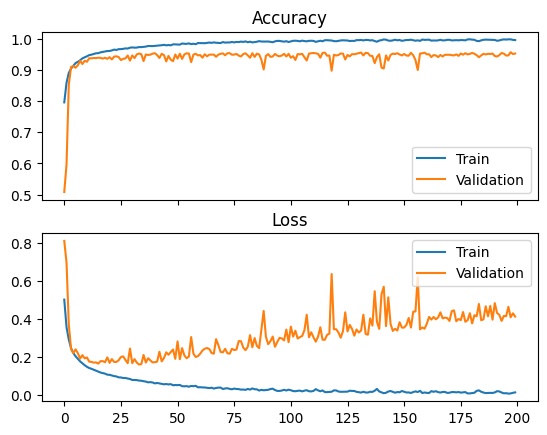

In [38]:
fig, ax = plt.subplots(2,sharex=True)
ax[0].set_title("Accuracy")
ax[0].plot(history.epoch, history.history['accuracy'],label='Train');
ax[0].plot(history.epoch, history.history['val_accuracy'],label='Validation');
ax[0].legend()
ax[1].set_title("Loss")
ax[1].plot(history.epoch, history.history['loss'],label='Train');
ax[1].plot(history.epoch, history.history['val_loss'],label='Validation');
ax[1].legend()

In [39]:
model.evaluate(x_test, y_test, verbose=True)

2907/2907 [==============================] - 8s 3ms/step - loss: 0.3801 - accuracy: 0.9527


[0.38007014989852905, 0.9526768922805786]